## GIVEN MODEL - Nearest Neighbors

In [70]:
#load class
import numpy as np
import pandas as pd # in case it's not installed then install using conda create -c conda-forge -n name_of_my_env python pandas
# more installations information can be found: https://pandas.pydata.org/docs/getting_started/install.html
import os
#load sklearn module for creating and evaluating ML models. In case sklearn isn't installed,
#follow this link https://scikit-learn.org/stable/install.html for further details on the installation process.
from sklearn.neighbors import KNeighborsClassifier #load your classifier. In this code, I have used KNN. You can choose other algorithms. You have to use at least 3 to complete this.
from sklearn.preprocessing import StandardScaler #module for perform scaling

from sklearn.model_selection import train_test_split #module for splitting datatset
from sklearn import metrics #module for evaluating performance

#load your data
df = pd.read_csv("../data/modified_data.csv") #change the name accordingly
print(df.head()) # prints top 5 rows from the datatset to check data is load or not

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# remove duplicatesd
df = df.drop_duplicates()

# prepare features
x = df.drop(['Label'],axis=1) #remove class or label
y = df['Label'] #load label

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2, random_state=5353) #split datatset. Here ratio is 80:20. Change accordingly

#---> I added random state here so we can have the same training and test sets on all model tests


# Scale the data using standardization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) #scale training set
x_test = scaler.transform(x_test) #scale test set

z = KNeighborsClassifier(n_neighbors=3) # KNN classifier for 3 neighbours
model_KNN = z.fit(x_train,y_train) # start training
predict = KNN.predict(x_test) # performance in the test set
RF_acc = round(metrics.accuracy_score(y_test,predict), 3)
m1_a = metrics.accuracy_score(y_test,predict)
print("Accuracy:", metrics.accuracy_score(y_test,predict)) # evaluating the performance based on accuracy

# library for save and load scikit-learn models
import pickle
# file name, recommending *.pickle as a file extension
filename = "model.pickle"
# save model
pickle.dump(z, open(filename, "wb"))


   Temp  Humd  Label
0  21.0  38.0    1.0
1  21.0  38.0    1.0
2  21.0  38.0    1.0
3  21.0  38.0    1.0
4  21.0  38.0    1.0
Missing Values:
 Temp     0
Humd     0
Label    0
dtype: int64
Accuracy: 0.9411764705882353


## Model #2 - Random Forest Classifier

In [43]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier as RFC #importing desired model
from sklearn.preprocessing import StandardScaler #module for perform scaling
from sklearn.model_selection import train_test_split #module for splitting datatset
from sklearn import metrics #module for evaluating performance

In [44]:
#loading and preparing data
df = pd.read_csv("../data/modified_data.csv") #change the name accordingly
print(df.head()) # prints top 5 rows from the datatset to check data is load or not

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# prepare features
x = df.drop(['Label'],axis=1) #remove class or label
y = df['Label'] #load label

# Scale the data using standardization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) #scale training set
x_test = scaler.transform(x_test) #scale test set

   Temp  Humd  Label
0  21.0  38.0    1.0
1  21.0  38.0    1.0
2  21.0  38.0    1.0
3  21.0  38.0    1.0
4  21.0  38.0    1.0
Missing Values:
 Temp     0
Humd     0
Label    0
dtype: int64


In [45]:
#creating training and testing sets with random state set to 5353 so models are more comparable
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2, random_state=5353)
# Scale the data using standardization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) #scale training set
x_test = scaler.transform(x_test) #scale test set
print("done.")

done.


In [61]:
#model creationg using a random forest model
forest = RFC(max_depth=3, random_state=0, n_estimators=1000)
model_forest = forest.fit(x_train, y_train)
print("done.")

done.


In [62]:
#model accuracy
predict_forest = model_forest.predict(x_test) # performance in the test set
m2_a = metrics.accuracy_score(y_test,predict_forest)
print("Accuracy:", metrics.accuracy_score(y_test,predict_forest))

Accuracy: 0.9852941176470589


In [48]:
# library for save and load scikit-learn models
import pickle
# file name, recommending *.pickle as a file extension
filename = "model_forest.pickle"
# save model
pickle.dump(z, open(filename, "wb"))

## Model #3

In [49]:
#importing dependencies
from sklearn import svm
svc = svm.SVC()
model_svc = svc.fit(x_train, y_train)
print("done.")


done.


In [57]:
#model accuracy
predict_svc = model_svc.predict(x_test) # performance in the test set
m3_a = metrics.accuracy_score(y_test,predict_svc)
print("Accuracy:", metrics.accuracy_score(y_test,predict_svc))

Accuracy: 0.8235294117647058


In [51]:
# file name, recommending *.pickle as a file extension
filename = "model_svc.pickle"
# save model
pickle.dump(z, open(filename, "wb"))

## Model Comparison

In [52]:
# create some cool graphs or tables to compare the models here
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay #note you need sklearn v1.1 to use this

done.


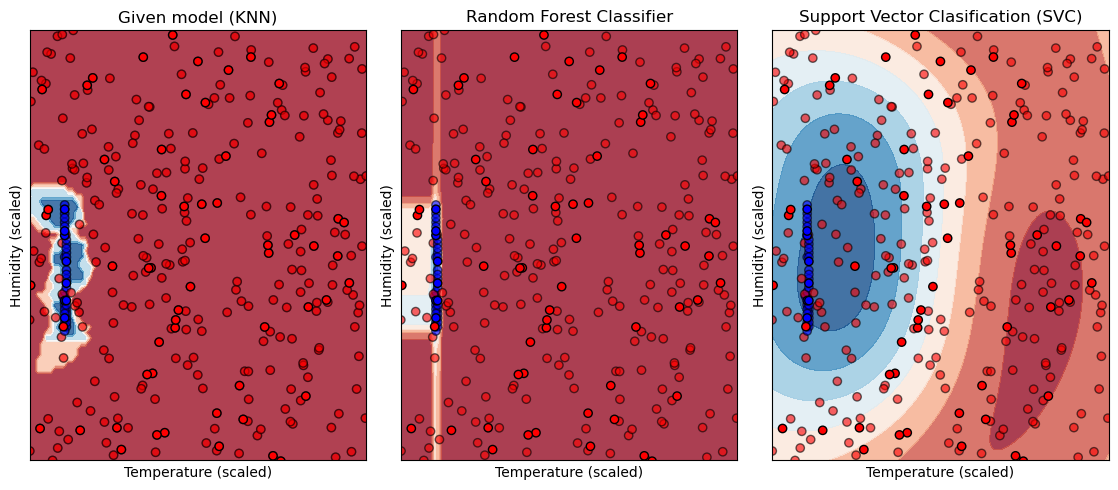

In [74]:
#requires all previous cells to have been run

#some variables and labels for the plots
names = ["Given model (KNN)", "Random Forest Classifier","Support Vector Clasification (SVC)"]
# accuracies = [round(metrics.accuracy_score(y_test,predict), 3),
#               round(metrics.accuracy_score(y_test,predict_forest), 3)] #add accuracy here
xmin, xmax = x_train[:,0].min(), x_train[:,0].max()
ymin, ymax = x_train[:,1].min(), x_train[:,1].max()

#creating figure
figure = plt.figure(figsize=(15,5))
i = 1

#iterate over names to plot data

#ploting the data first
cm = plt.cm.RdBu
cm_b = ListedColormap(["#FF0000","#0000FF"])
ax = plt.subplot(1,len(names)+1,i)
#adding training data to graphs
#alpha set to 0.6 to make distinguishable
ax.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=cm_b, alpha=0.6, edgecolors="k")
#adding test data to graphs
ax.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=cm_b, alpha=1, edgecolors="k")
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin,ymax)
ax.set_xticks(())
ax.set_yticks(())
i+1

# iterate over names to plot predictions
for n in names:
    ax = plt.subplot(1,len(names)+1,i)
    if n == "Given model (KNN)":
        DecisionBoundaryDisplay.from_estimator(model_KNN, x_test, cmap = cm, alpha = 0.8, ax=ax, eps=0.5)
        score = m1_a
        ax.set_title(names[0])
    elif n == "Random Forest Classifier":
        DecisionBoundaryDisplay.from_estimator(model_forest, x_test, cmap = cm, alpha = 0.8, ax=ax, eps=0.5)
        score = m2_a
        ax.set_title(names[1])
    elif n == "Support Vector Clasification (SVC)":
        DecisionBoundaryDisplay.from_estimator(model_svc, x_test, cmap = cm, alpha = 0.8, ax=ax, eps=0.5)
        score = m3_a
        ax.set_title(names[2])
        print("done.")


    #alpha set to 0.6 to make distinguishable
    ax.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=cm_b, alpha=0.6, edgecolors="k")
    #adding test data to graphs
    ax.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=cm_b, alpha=1, edgecolors="k")
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin,ymax)
    ax.set_xlabel("Temperature (scaled)")
    ax.set_ylabel("Humidity (scaled)")
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
        


plt.tight_layout()
plt.show()